# Project: Investigation in the TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Intro**: I used the TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue..

> In this analysis,  I will try to answer these three questions:
1. do movie production and its revenues increasing over time?
2. What kinds of properties are associated with movies that have high rates?
3. What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plts

<a id='wrangling'></a>
## Data Wrangling

> **Intro To This Section**: In this section of the report, I will load in the data, check for cleanliness, and then clean the dataset for analysis. 

### General Properties

In [2]:
df1 = pd.read_csv("tmdb-movies.csv")
df = df1.copy()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning section

#### I will first drop the unuseful columns that I will not use in my analysis.

In [5]:
df.drop(['homepage', 'id', 'imdb_id', 'overview', 'tagline', 'revenue_adj', 'budget_adj', 'release_date'], axis =1, inplace =True)

#### Then I will drop the null values and the duplicates in my data and I will use the shape function to ensure that the changes happened correctly to my data. I found also that some movies have zero revenue, but it still good for my analysis, so I will not drop these rows.

In [6]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df.shape

(8666, 13)

#### I will change the values of the revenue to a real numbers

In [7]:
df['revenue']
df["revenue"]= df["revenue"].astype(np.int64)
df['revenue'].head()

0    1513528810
1     378436354
2     295238201
3    2068178225
4    1506249360
Name: revenue, dtype: int64

#### The one-row has many actors, keywords, genres, directors, production companies. So I will separate these values because this will help me in my analysis.  

In [8]:
df['cast']=df['cast'].str.split("|",expand=True)
df['keywords']=df['keywords'].str.split("|",expand=True)
df['genres']=df['genres'].str.split("|",expand=True)
df['director']=df['director'].str.split("|",expand=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Intro To This Section**: In this part, I will answer my questions. 

### do movies production increasing over time?
>**what is the importance of this question?** 
> This question is important because The answer to this question will be like a measure that will say to the investors that should they invest in this field or no.

>**How I will get the answer to this question?**
> I will see the relationship between the rates of the movies with each of the following:
1. The number of movies over years 
2. revenues  

>If The number of movies increasing over years. This will mean that The movies production field is increasing, So we should invest in this field 

>If The revenues of movies increasing over years. this will mean that The movies production field is increasing, So we should invest in this field 

> If the revenues of movies  or the number of movies decreasing over the years, The movies production field is decreasing then we shouldn't invest in this field

Text(0.5, 0, 'release year of the movies')

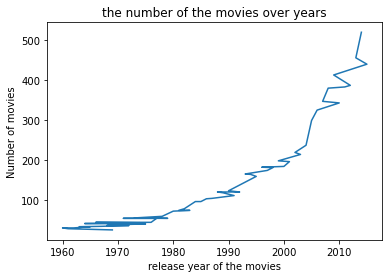

In [9]:
the_number_of_the_movies_over_years= df['release_year'].value_counts()
the_number_of_the_movies_over_years.plot(title ='the number of the movies over years')
plts.ylabel("Number of movies")
plts.xlabel("release year of the movies")


>This chart see us a strong positive correlation between the number of movies and the years. This means that the number of movies increasing over the years and the movie production field also increasing.

Text(0.5, 0, 'Release year of the movies')

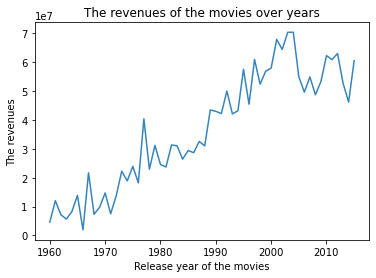

In [10]:
the_revenues_of_the_movies_over_years=df.groupby('release_year')['revenue'].mean()
the_revenues_of_the_movies_over_years.plot(title='The revenues of the movies over years',alpha=.9)
plts.ylabel("The revenues")
plts.xlabel("Release year of the movies")

>This chart see us a strong positive correlation between the revenues of movies and the years. This means that the revenues of movies increasing over the years and the movie production field also increasing.

> **conclusion**: It's obvious that the production of the movies increased over the years and its revenues, So we should invest in this field 

### What kinds of properties are associated with movies that have high rates?
>**what is the importance of this question?** 
> This question is important because The answer to this question will be like a measure that says to directors and actors how to become more famous and making good movies.

>**How I will get the answer to this question?**
> I will see the relationship between the rates of the movies with each of the following:
1. budget 
2. vote count 
3. runtime 
4. actors 
5. keywords 
6. genres 
7. directors
8. production companies

>If  all these relationships are positive, then all of these factors are increasing the movie rate 
>If  all these relationships are negative, then all of these factors are decreasing the movie rate
>If  some of these relationships are negative and some are positive, then some of these factors are decreasing the movie rate and these factors are increasing the movie rate 

>I will also make charts that will saw us these relationships and a list of the top five actors, keywords, genres, directors, production companies in their movies rates.


Text(0, 0.5, 'Rate')

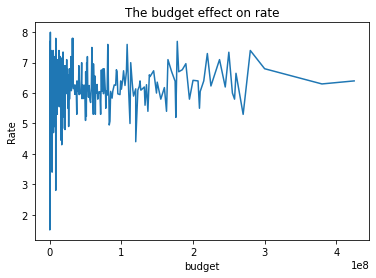

In [11]:
budge_effect = df.groupby('budget')["vote_average"].mean()
budge_effect.plot(title = "The budget effect on rate")
plts.ylabel("Rate")

>This chart see us that there is no correlation between the budget of movies and the rate of the movie. This means that the budget of movies is not an effective factor in the rates of the movies

Text(0, 0.5, 'Rate')

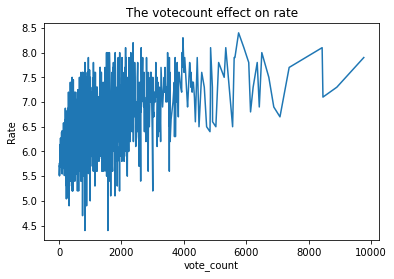

In [12]:
vote_count_effect = df.groupby('vote_count')["vote_average"].mean()
vote_count_effect.plot(title = "The votecount effect on rate")
plts.ylabel("Rate")

>This chart see us that there is a weak positive correlation between the vote count of movies and the rate of the movie. This means that the vote count of movies is a weak effective factor in the rates of the movies

Text(0, 0.5, 'Rate')

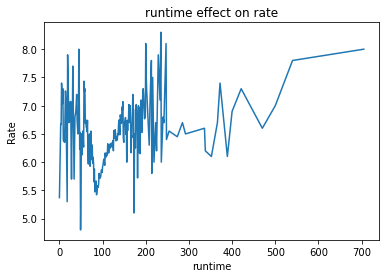

In [13]:
runtime_effect = df.groupby('runtime')["vote_average"].mean()
runtime_effect.plot(title = "runtime effect on rate")
plts.ylabel("Rate")

>This chart see us that there is no correlation between the runtime of movies and the rates of the movies. This means that the runtime of movies is not an effective factor in the rates of the movies

#### First I will make a function that gives me the first five people from some categories according to their movies vote average 

In [14]:
def thing_effect_on_vote(thing):
    thing = pd.DataFrame(thing)
    thing.sort_values(by=['vote_average'], axis =0, ascending=False, inplace = True)
    print(thing.head(5))    

cast_effect = df.groupby('cast')["vote_average"].mean()
thing_effect_on_vote(cast_effect)

                 vote_average
cast                         
David Gilmour             8.7
Freddie Mercury           8.5
Travis Rice               8.5
Adriana Barraza           8.4
David Byrne               8.4


In [15]:
keywords_effect = df.groupby('keywords')["vote_average"].mean()
thing_effect_on_vote(keywords_effect)

                vote_average
keywords                    
live concert             8.5
tour                     8.3
tv mini-series           8.3
fashion                  8.1
italo-american           8.1


In [16]:
genres_effect = df.groupby('genres')["vote_average"].mean()
thing_effect_on_vote(genres_effect)

             vote_average
genres                   
Documentary      6.951556
Animation        6.419861
Music            6.418056
History          6.330556
Crime            6.282698


Text(0.5, 0, 'Rate')

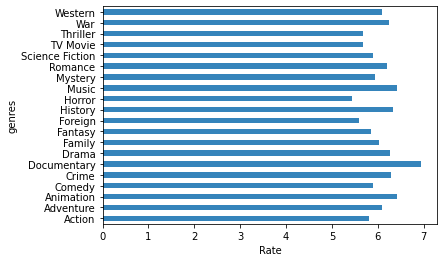

In [17]:
genres_effect.plot(kind= 'barh',alpha=0.9)
plts.xlabel("Rate")

>This chart see us that there some genres of movies have high rate more than others. such as documentary movies have a high rate comparing to horror movies.

In [18]:
vote_average_effect = df.groupby('director')["vote_average"].mean()
thing_effect_on_vote(vote_average_effect)

                        vote_average
director                            
David Mallet                     8.7
Curt Morgan                      8.5
Saul Swimmer                     8.5
Jorge RamÃ­rez SuÃ¡rez           8.4
Dean Wellins                     8.3


> **conclusion**: 
#### here are the factors that affect positively on the rate of the movies:
1. vote count of the movie

#### here are the factors that affect negatively the rate of the movies:
1.release year of the movie

#### here are the factors that don't affect the rate of the movies:
1.budget of the movie

2.runtime of the movie 

#### The actors, keywords, genres, directors, production companies can affect the rate of the movies 

### What kinds of properties are associated with movies that have high revenues?
>**what is the importance of this question?** 
> This question is important because The answer of this question will be like a measure that says to producers of the movies how to gain more revenues from their movies
>**How I will get the answer to this question?**
> I will see the relationship between the revenues of the movies and each of the following:
1. budget 
2. vote count 
3. runtime 
4. actors 
5. keywords 
6. genres 
7. directors
8. production companies

>If  all these relationships are positive, then all of these factors are increasing the movie revenues 
>If  all these relationships are negative, then all of these factors are decreasing the movie revenues
>If  some of these relationships are negative and some are positive, then some of these factors are decreasing the movie revenues and these factors are increasing the movie revenues 

>I will also make charts that will saw us these relationships and a list of the top five actors, keywords, genres, directors, production companies in their movies revenue.


#### First I will make a function that gives me the first five people from some categories according to their movies revenue

In [19]:
def thing_effect_on_revenue(thing):
    thing = pd.DataFrame(thing)
    thing.sort_values(by=['revenue'], axis =0, ascending=False, inplace = True)
    thing['revenue']= thing["revenue"].astype(np.int64)
    print(thing.head(5))

Text(0, 0.5, 'The revenue of the movie')

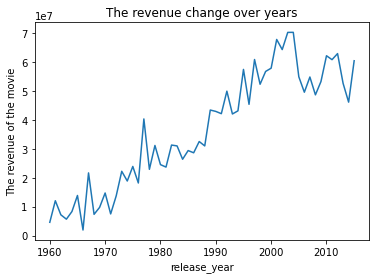

In [20]:
rate_over_years = df.groupby('release_year')["revenue"].mean()
rate_over_years.plot(title = "The revenue change over years")
plts.ylabel("The revenue of the movie")

>This chart see us a strong positive correlation between the revenues of movies and the years. This means that the revenues of movies increasing over the years and the movie production field also increasing.

Text(0, 0.5, 'The revenue of the movie')

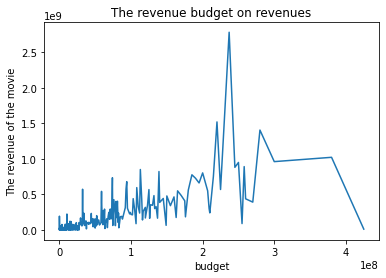

In [21]:
budge_effect = df.groupby('budget')["revenue"].mean()
budge_effect.plot(title = "The revenue budget on revenues")
plts.ylabel("The revenue of the movie")

>This chart see us a normal distribution correlation between the budget of movies and their revenues. This means that the revenues of movies increasing from the budget of 0 to 250000000 and decreasing by increasing the budget after this limit

Text(0.5, 0, 'The revenues of the movies')

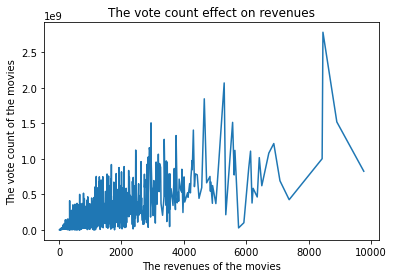

In [22]:
vote_count_effect = df.groupby('vote_count')["revenue"].mean()
vote_count_effect.plot(title = "The vote count effect on revenues")
plts.ylabel("The vote count of the movies")
plts.xlabel("The revenues of the movies")

>This chart see us a weak positive correlation between the revenues of movies and vote count on movies. This means that the vote count of movies is a weak effective factor in the revenues of the movies

Text(0, 0.5, 'The revenue of the movie')

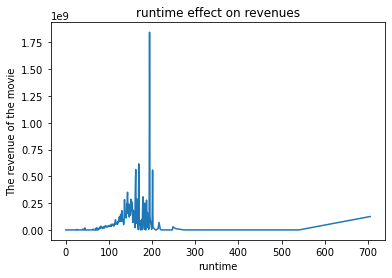

In [23]:
runtime_effect = df.groupby('runtime')["revenue"].mean()
runtime_effect.plot(title = "runtime effect on revenues")
plts.ylabel("The revenue of the movie")

>This chart see us a normal distribution correlation between the runtime of movies and their revenues. This means that the revenues of movies increasing from the runtime of 0 to 200 minutes and decreasing by increasing the runtime after this limit

In [24]:
cast_effect = df.groupby('cast')["revenue"].mean()
thing_effect_on_revenue(cast_effect)

                    revenue
cast                       
Chris Pratt      1143420604
William Moseley   748806957
Scott Adsit       652105443
Ray Romano        643628244
Mark Hamill       628832669


In [25]:
keywords_effect = df.groupby('keywords')["revenue"].mean()
thing_effect_on_revenue(keywords_effect)

                      revenue
keywords                     
culture clash      2781505847
self sacrifice     1327817822
assistant          1156730962
shipwreck           922517094
blue footed booby   877244782


In [26]:
genres_effect = df.groupby('genres')["revenue"].mean()
thing_effect_on_revenue(genres_effect)

                   revenue
genres                    
Adventure        140898872
Animation        100030604
Science Fiction   99743538
Family            87586909
Fantasy           80632833


Text(0, 0.5, 'The revenues of the movies')

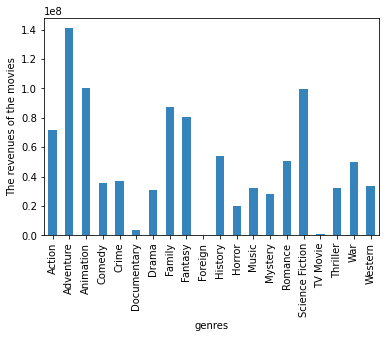

In [27]:
genres_effect.plot(kind= 'bar',alpha=0.9)
plts.ylabel("The revenues of the movies")

>This chart see us that there some genres of movies have high rate more than others. such as adventure movies have a high rate comparing to documentary movies.

In [28]:
director_effect = df.groupby('director')["revenue"].mean()
thing_effect_on_revenue(director_effect)

                     revenue
director                    
David Yates       1038573906
Joss Whedon        987821047
Lee Unkrich        812994083
Colin Trevorrow    758768301
Robert Stromberg   758410378


> **conclusion**:

> release year of the movie affect positively on the revenues of the movies

> The budget,  vote count,  runtime of the movies take a normal distrubtion in their affect on the revenues of movies

> The actors, keywords, genres, directors, production companies can affects widely on the revenues of the movies 

<a id='conclusions'></a>
##  The Summary Conclusions

> It's obvious that the production of the movies increased over the years and its revenues.

> vote count of the movie affect positively the rate of the movies

> The release year affects negatively the rate of the movies 

> budget of the movie runtime of the movie doesn't affect the rate of the movies

> The actors, keywords, genres, directors, production companies can affect the rate of the movies

> release year of the movie affect positively on the revenues of the movies

> The budget,  vote count,  runtime of the movies take a normal distrubtion in their affect on the revenues of movies

> The actors, keywords, genres, directors, production companies can affects widely on the revenues of the movies 

> **The Limitation of this analysis**
>>The data is about 10000 movies over about 60 years, so it lost a lot of movies, but still give us good measurements. I found some columns that have null values in a lot of rows, but it was useless to my analysis, so I dropped it. Overall, this data has a good number of movies that can give a general idea about the movie-making production.